# Conditional Graph 🚧

## Table of Contents
- [Objectives](#objectives)
- [1. Agent State](#agent-state)
- [2. Mathematical Nodes](#mathematical-nodes)
- [3. Router Logic](#router-logic)
- [4. Build the Graph](#build-the-graph)
- [5. Invoke and Branch](#invoke-and-branch)
- [Main Goal](#main-goal)

<a id='objectives'></a>
## Objectives ✅:

1. Implement **conditional logic** to route the flow of data to different nodes
2. Use **START** and **END** nodes to manage entry and exit points explicitly.
3. Design multiple nodes to perform different operations (addition, subtraction).
4. Create a **router node** to handle decision-making and control graph flow.

In [2]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_number: int

In [5]:
def adder(state: AgentState) -> AgentState:
    state['final_number'] = state['number1'] + state['number2']
    return state

def subber(state: AgentState) -> AgentState:
    state['final_number'] = state['number2'] - state['number1']
    return state

def muller(state: AgentState) -> AgentState:
    state['final_number'] = state['number2'] * state['number1']
    return state

def decide_next(state:AgentState) -> AgentState:
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '*':
        return 'multiplication_operation'
    else:
        return 'subtraction_operation'


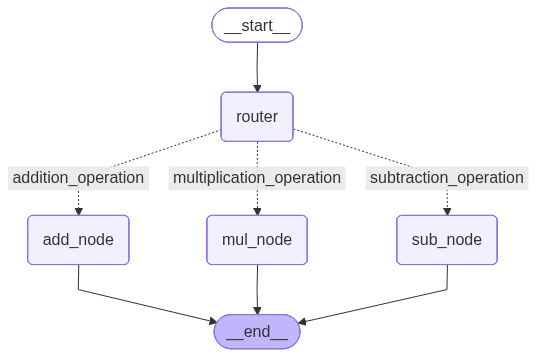

In [9]:
graph = StateGraph(AgentState)

graph.add_node('add_node', adder)
graph.add_node('sub_node', subber)
graph.add_node('mul_node', muller)
graph.add_node('router', lambda state: state)

graph.set_entry_point('router')
graph.set_finish_point('router')
graph.add_conditional_edges(
    'router', 
    decide_next, 
    {
        'multiplication_operation': 'mul_node',
        'addition_operation': 'add_node',
        'subtraction_operation': 'sub_node'
    }
)

app = graph.compile()
app

In [11]:
init_state1 = AgentState(number1 = 10, operation = '+', number2 = 5)
print(app.invoke(init_state1))
init_state2 = AgentState(number1 = 10, operation = '-', number2 = 5)
print(app.invoke(init_state2))
init_state2 = AgentState(number1 = 10, operation = '*', number2 = 5)
print(app.invoke(init_state2))

{'number1': 10, 'operation': '+', 'number2': 5, 'final_number': 15}
{'number1': 10, 'operation': '-', 'number2': 5, 'final_number': -5}
{'number1': 10, 'operation': '*', 'number2': 5, 'final_number': 50}
